# *BedrockRiver* model notes 


## Python setup

In [1]:
import bedrock_river as br, sympy as sy, numpy as np, matplotlib.pyplot as plt
sy.init_printing(pretty_print=True,wrap_line=True) #,num_columns=20 IPython ignores options
from symbols import *

In [2]:
sm = br.sinuosity.model()

Initializing open channel flow hydraulics...done


In [3]:
sm.get_params()

## Definition of terms

\begin{eqnarray}
     &x  = \text{downstream axis}  \qquad&\dots\quad x\geq0 \\
     &y  = \text{transverse axis}   \qquad&\dots\quad +\infty>y>-\infty \\
     &z  = \text{vertical axis}     \qquad&\dots\quad z\geq0 \\
     &c_{+}  = \text{channel left corner in +y direction} 
                       \qquad&\dots\quad +\infty>c_{+}(x,t)>-\infty \\
     &c_{-}  = \text{channel right corner in -y direction} 
                       \qquad&\dots\quad +\infty>c_{-}(x,t)>-\infty \\
     &h  = z\,\,\text{coordinate of (flat, horizontal) channel bed}
                       \qquad&\dots\quad +\infty>h(x,t)>-\infty \\
     &w  = \text{channel width}  
                       \qquad&\dots\quad w(x,t)>0 \\
     &m  = y\,\,\text{coordinate of channel midline}
                       \qquad&\dots\quad +\infty>m(x,t)>-\infty \\
     &s  = \text{distance along channel midline}  
                       \qquad&\dots\quad s(x,t)\geq 0 \\
     &L  = \text{length scale (half wavelength) of meandering} 
                       \qquad&\dots\quad L> 0 \\
     &R  = \text{radius of bend curvature} 
                       \qquad&\dots\quad R(x,t)> 0 \\
     &\psi  = \text{angle subtended by bend apex} 
                       \qquad&\dots\quad \psi(x,t)> 0 \\
     &\chi  = \text{sinuosity}  
                       \qquad&\dots\quad \chi(x,t)\geq 0 
\end{eqnarray}

\begin{eqnarray}
     &\xi_z  = \text{bed bedrock wear rate} 
                       \qquad&\dots\quad \xi_z(x,t) \\
     &\xi_{y\pm}  = \text{wall bedrock wear rates (}+\text{left,}-\text{right)} 
                       \qquad&\dots\quad \xi_{y\pm}(x,t) \\
     &\dfrac{\mathrm{d}\vec{c}_\pm}{\mathrm{d}t}  = \text{corner velocities} 
                       \qquad&\dots\quad \vec{c}_\pm(x,t) \\
     &\dfrac{\mathrm{d}\vec{m}}{\mathrm{d}t}  = \text{channel erosion rate 3-vector} 
                       \qquad&\dots\quad \vec{m}(x,t) \\
     &\theta  = \text{wall angle from horizontal} 
                       \qquad&\dots\quad \pi/2\geq\theta> 0 \\
     &\phi  = \text{corner vector angle from vertical} 
                       \qquad&\dots\quad \pi/2 > \phi(c_\pm) > -\pi/2
\end{eqnarray}

\begin{eqnarray}
     &Q  = \text{volume water discharge} 
                       \qquad&\dots\quad Q>0 \\
     &A  = \text{flow cross-sectional area} 
                       \qquad&\dots\quad A>0 \\
     &g  = \text{acceleration by gravity} 
                       \qquad&\dots\quad g = 9.81 \,\mathrm{m}\,\mathrm{s}^2 \\
     &f  = \text{boundary friction factor} 
                       \qquad&\dots\quad f=0.01 \\
     &C  = \text{Chézy friction coefficient} 
                      \qquad&\dots\quad C^2 \approx 10^{-3} \,\mathrm{s}^2\,\mathrm{m}^{-1} \\
     &\rho  = \text{fluid density} 
                       \qquad&\dots\quad \rho \approx 1000 \,\mathrm{kg}\,\mathrm{m}^{-3} \\
     &\beta_0  = \text{channel slope angle at }\chi=0 
                       \qquad&\dots\quad \beta_0 >0 \\
     &\tau  = \text{mean boundary shear stress} 
                       \qquad&\dots\quad \tau(x,t)>0 \\
     &p  = \text{flow "wetted" perimeter} 
                       \qquad&\dots\quad p(x,t)>0 \\
     &u  = \text{flow speed} 
                       \qquad&\dots\quad u(x,t)>0 \\
     &d  = \text{flow depth} 
                       \qquad&\dots\quad d(x,t)>0 \\
     &\epsilon  = \text{bend excess speed perturbation} 
                       \qquad&\dots\quad 1\gg\epsilon(x,t)\geq 0 \\
     &\epsilon_r  = \text{reference bend excess perturbation} 
                       \qquad&\dots\quad \epsilon_r > 0 \\
     &\Omega  = \text{flow width-depth ratio} 
                       \qquad&\dots\quad \Omega(x,t)>0 \\
     &\Omega_r  = \text{reference width-depth ratio} 
                       \qquad&\dots\quad \Omega_r=20
\end{eqnarray}

\begin{eqnarray}
     &\mu  =  \text{bedrock wear rate}\Leftrightarrow \text{erodibility}  
                       \qquad&\dots\quad \mu>0 \\
     &\eta  = \text{wall wear rate relative to bed} 
                       \qquad&\dots\quad \eta \approx 10 \\
     &u_c  = \text{threshold flow speed for bedrock wear} 
                       \qquad&\dots\quad u_c>0 \\
     &\nu  = \text{wear model flow speed exponent} 
                       \qquad&\dots\quad \nu = 1
\end{eqnarray}

## Basic equations

Channel width:

\begin{equation}
    w = c_{+} + c_{-}  \quad\dots\,\, w > 0
\end{equation}

where $c_{+}$ is the left-hand $y$-coordinate of the wall-bed intersection, or left corner, and $c_{-}$ is the right-hand counterpart. Both are measured in a positive sense away from the $x$-axis, meaning that $c_{-}$ is somewhat counterintuitively measured in the opposite direction to $c_{+}$.

Channel midline displacement:

\begin{equation}
    m = \dfrac{\left| c_{+} - c_{-} \right|}{2}
      \quad\dots\,\, m \geq 0
\end{equation}

which measures the lateral ($y$-axis) displacement of a channel as a result of meander motion. For convenience it is defined as the absolute value; only displacements in the leftward, $y$-axis "up", positive $c_{+}$ direction are treated here.

Sinuosity:

\begin{equation}
    \chi = f_{m\chi}\!\left(\dfrac{2m}{L}\right)
    = f_{m\chi}\!\left(\dfrac{\left| c_{+} - c_{-} \right|}{L} \right)
       \quad\dots\,\, \chi \geq 0
\end{equation}

where $f_{m\chi}\!(\cdot)$ is a monotonic function that asymptotes to $f_{m\chi}(x)\sim x$ for large $x$.
This sinuosity is offset by unity from classical sinuosity $K=\chi+1$, such that $\chi=0$ for a straight channel.

Streamwise distance $s$ along the channel midline:

\begin{equation}\displaystyle
    s = \int_0^x \left( \chi(l)+1 \right) \,\mathrm{d}l
    \quad\Leftrightarrow\quad
    \frac{\mathrm{d}s}{\mathrm{d}x} = \chi+1
\end{equation}

Streamwise channel gradient $\nabla_s h$:

\begin{equation}
    \dfrac{\partial{h}}{\partial{s}} 
    = \dfrac{1}{\chi+1}\dfrac{\partial{h}}{\partial{x}}
\end{equation}

Corner vectors:

\begin{equation}
    \vec{C}_{\pm}
    \equiv 
    \begin{pmatrix}
        \partial{c_{\pm}}/\partial{t} \\
        \partial{h}/\partial{t}
    \end{pmatrix}
    = f_c\!\left(c_{\pm},\, \chi, \dfrac{\partial{h}}{\partial{x}}\right)
\end{equation}

Channel erosion 3-vector:

\begin{equation}
    \vec{V}
    \equiv 
    \begin{pmatrix}
        \partial{w}/\partial{t} \\
        \partial{m}/\partial{t} \\
        \partial{h}/\partial{t}
    \end{pmatrix}
    = f_V\!\left(w,\, m,\, \chi, \dfrac{\partial{h}}{\partial{x}}\right)
\end{equation}

\begin{equation}
    \dfrac{\partial{w}}{\partial{t}} 
    = \dfrac{\partial{c_{+}}}{\partial{t}} + \dfrac{\partial{c_{-}}}{\partial{t}}
\end{equation}

\begin{equation}
    \dfrac{\partial{m}}{\partial{t}} 
    = \dfrac{1}{2} \left(
    \dfrac{\partial{c_{+}}}{\partial{t}} - \dfrac{\partial{c_{-}}}{\partial{t}}
    \right)
    \dfrac{ c_{+}-\,c_{-}}{\left|c_{+}-\,c_{-}\right|}
    = \dfrac{1}{2} \left(
    \dfrac{\partial{c_{+}}}{\partial{t}} - \dfrac{\partial{c_{-}}}{\partial{t}}
    \right)
    \,\mathrm{sgn}\left( c_{+}-\,c_{-} \right)
\end{equation}

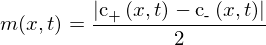

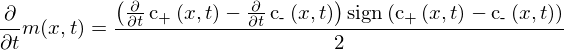

In [4]:
midline_eqn = sy.Eq(f_m, sy.Abs(f_c_m-f_c_p)/2)
midline_eqn
sy.Eq(sy.diff(midline_eqn.args[0],t),sy.diff(midline_eqn.args[1],t))

## Data

In [5]:
import pandas as pd
williams_df = pd.read_excel('Data/Williams_1986_table1.xlsx',header=[0,1],na_values=[-1,''])
# williams_df = pd.read_excel('Williams_1986_table1.xlsx',skip=0,na_values=[-1,''])
# williams_df.drop(0)
# williams_data.drop(columns=['ref'])
# williams_data.drop(columns=['index','ref'])
williams_df = williams_df.drop(10)
williams_df

index,area,width,depth,wavelength,bend_length,belt_width,radius_R,sinuosity_K,arc_angle,sinuosity_chi
,m^2,m,m,m,m,m,m,-,degrees,-
1,0.044,1.5,0.03,10.5,6.8,5.2,2.6,1.31,140,0.31
2,8090.000,670.0,12.00,11720.0,12780.0,10040.0,2270.0,2.05,163,1.05
3,12350.000,932.0,13.20,13580.0,13300.0,8480.0,2470.0,2.08,159,1.08
4,20900.000,1975.0,10.60,15480.0,12940.0,9290.0,2640.0,1.68,177,0.68
5,16500.000,1275.0,13.00,11720.0,8610.0,7490.0,2420.0,1.47,136,0.47
6,15100.000,980.0,15.40,12040.0,12800.0,9500.0,3430.0,2.05,165,1.05
7,17200.000,1200.0,14.40,16520.0,12460.0,9000.0,3580.0,1.56,141,0.56
8,17350.000,986.0,17.60,11500.0,11380.0,9850.0,2430.0,1.98,171,0.98
9,510.000,133.0,3.80,1790.0,2040.0,1590.0,324.0,2.28,177,1.28


In [6]:
williams_Rndim_for_chi = np.array((
    williams_df['sinuosity_chi'].values,
    ((2*williams_df['radius_R']/williams_df['wavelength']).values) ))
williams_Rndim_for_mndim = np.array((
    (williams_df['belt_width']/williams_df['wavelength']).values,
    (2*williams_df['radius_R']/williams_df['wavelength']).values ))
williams_chi_for_mndim = np.array((
    (williams_df['belt_width']/williams_df['wavelength']).values,
    williams_df['sinuosity_chi'].values ))

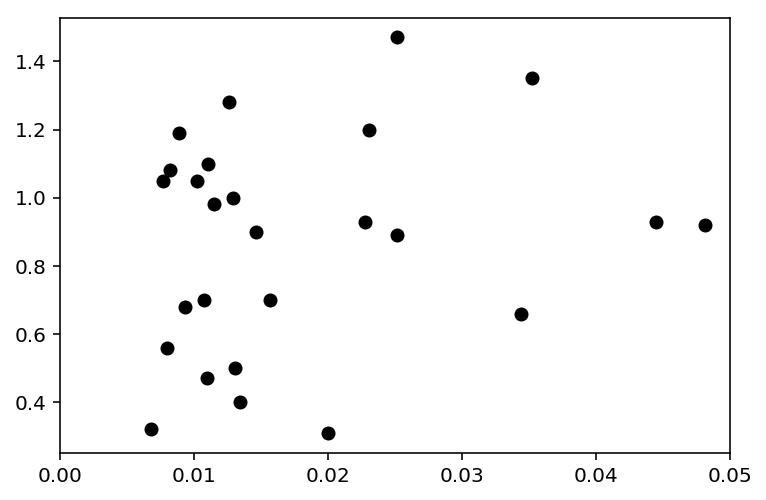

In [7]:
L_x = williams_df['wavelength'].values
w_x = williams_df['width'].values
d_x = williams_df['depth'].values
chi_x = williams_df['sinuosity_chi'].values
A_x = williams_df['area'].values
L_x = L_x[~np.isnan(A_x)]
w_x = w_x[~np.isnan(A_x)]
d_x = d_x[~np.isnan(A_x)]
chi_x = chi_x[~np.isnan(A_x)]
A_x = A_x[~np.isnan(A_x)]
plt.plot(np.sqrt(A_x)/L_x,chi_x,         'ko');
axes = plt.gca()
# axes.set_xscale('log')
# axes.set_yscale('log')
plt.xlim(0,0.05);

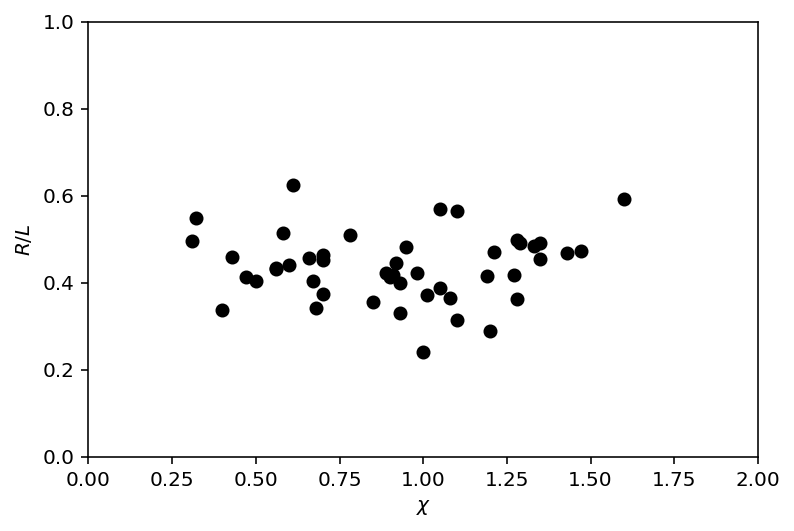

In [8]:
plt.plot(*williams_Rndim_for_chi,'ko');
plt.ylabel('$R/L$')
plt.xlabel('$\chi$')
plt.xlim(0,2);
plt.ylim(0,1);

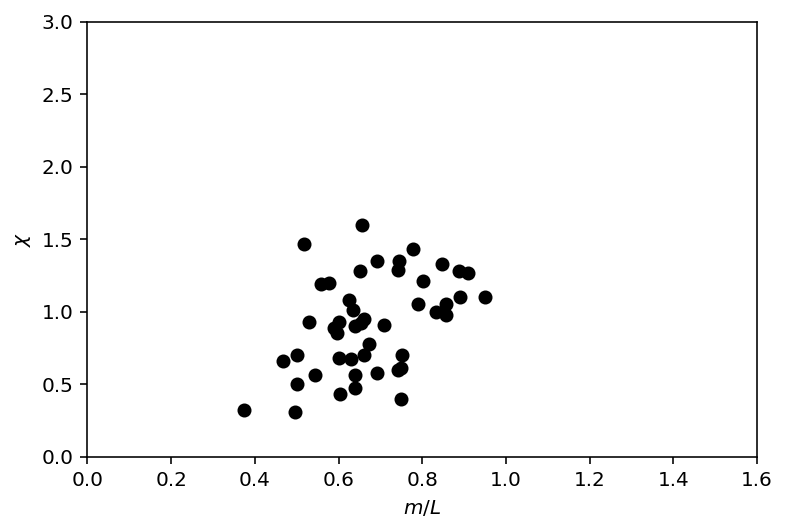

In [9]:
plt.plot(*williams_chi_for_mndim,'ko');
plt.xlabel('$m/L$')
plt.ylabel('$\chi$')
plt.xlim(0,1.6);
plt.ylim(0,3);

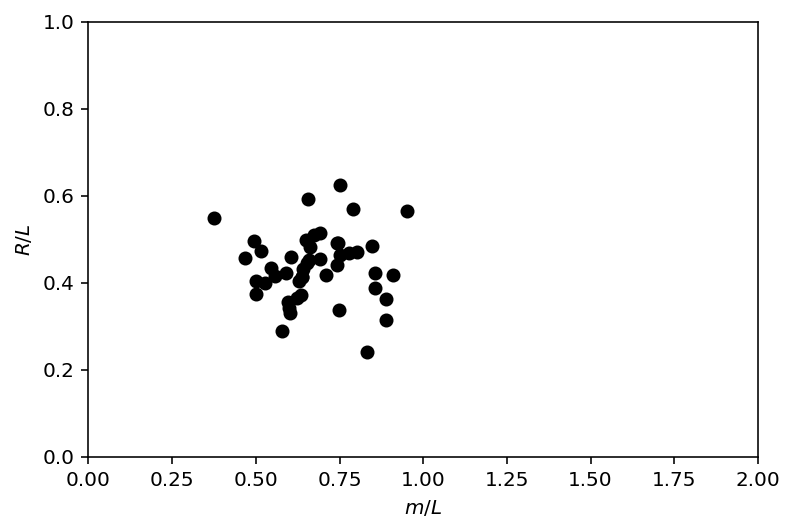

In [10]:
plt.plot(*williams_Rndim_for_mndim,'ko');
plt.ylabel('$R/L$')
plt.xlabel('$m/L$')
plt.xlim(0,2);
plt.ylim(0,1);

## Planform geometry

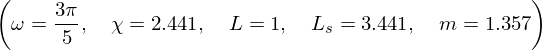

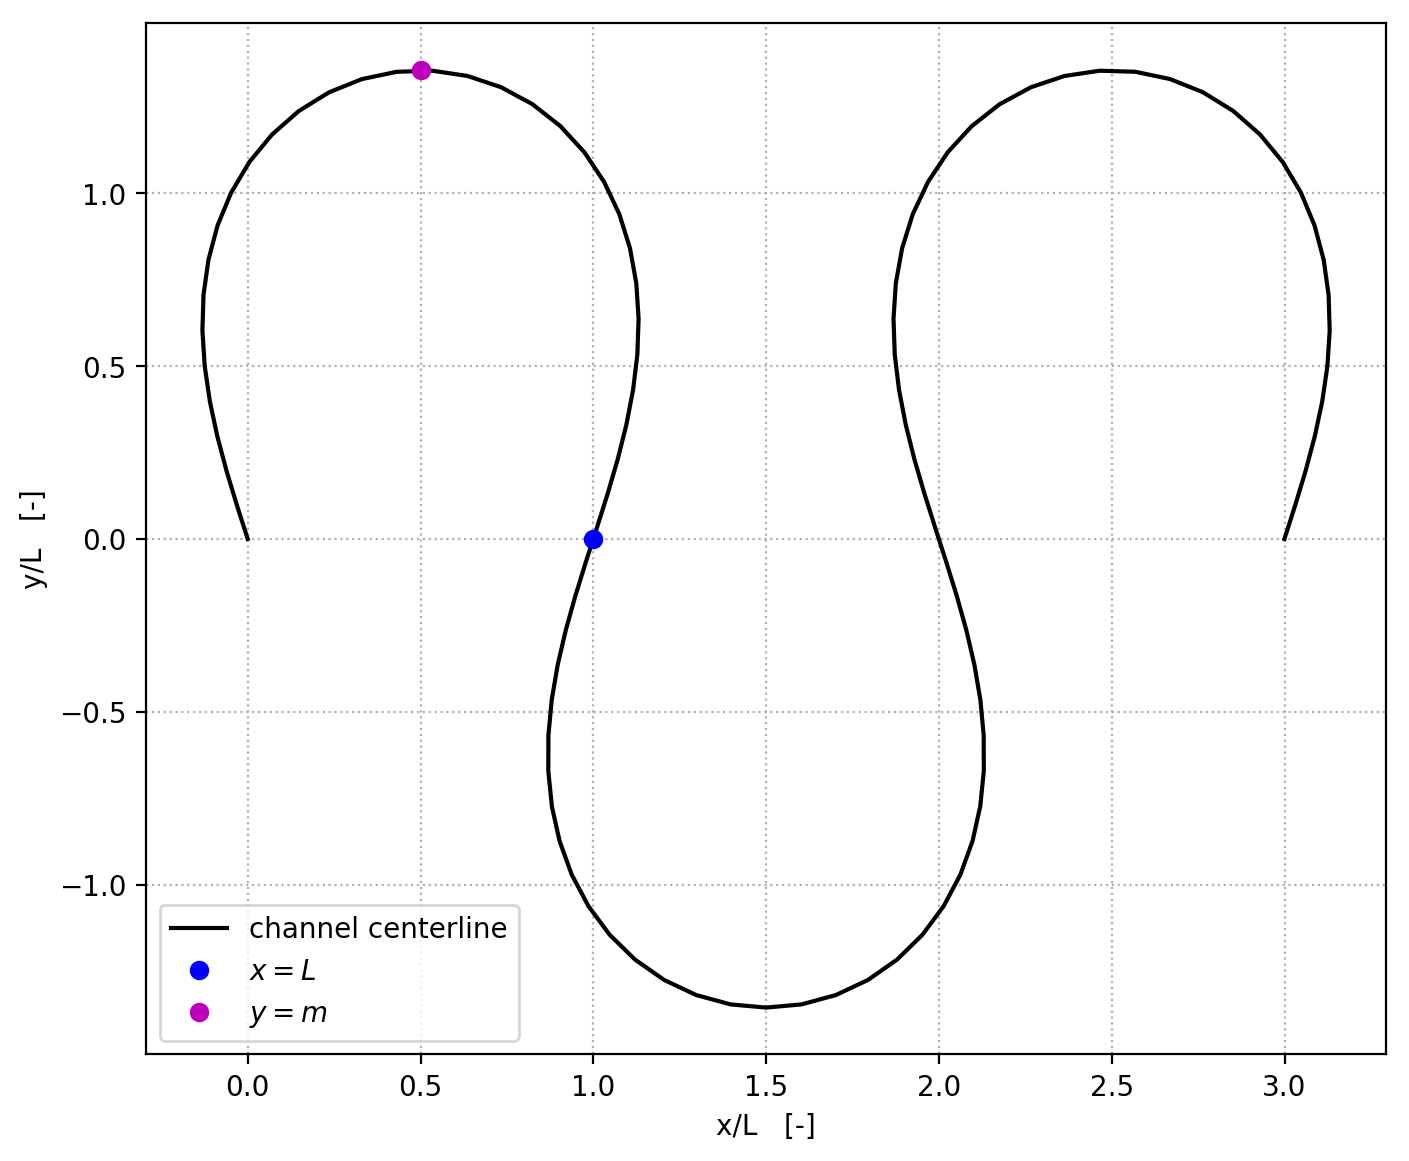

In [11]:
omega_x = 3*sy.pi/5
L_x = 1
m_x,chi_x,Ls_x = br.sinuosity.m_chi_Ls_from_omega_L(np.float(omega_x),L_x)

# s_array = sinuosity.s_samples(Ls=Ls_x, n_loops=3, n_steps=100)
# sgc_array = sinuosity.sgc_dx_dy(s_array,np.float(omega_x),np.float(Ls_x))
# x_array,y_array = sinuosity.sgc_integrate(s_array,sgc_array)

s_array, sgc_dx_dy_array, x_array,y_array = br.sinuosity.sgc(omega_x)

br.plot.plot_sgc_loops(sm, x_array,y_array,L_x,m_x)
( sy.Eq(omega,omega_x), sy.Eq(chi,np.round(chi_x,3)), sy.Eq(L,np.round(L_x,3)),
  sy.Eq(Ls,np.round(Ls_x,3)), #sy.Eq(m/Ls,np.round(m_x/Ls_x,3)), 
  sy.Eq(m,np.round(m_x,3)) )

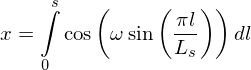

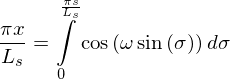

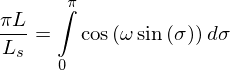

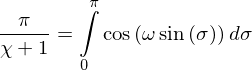

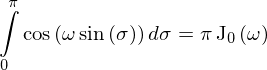

In [12]:
integrand = (sy.cos(omega*sy.sin(sy.pi*l/Ls)))
sgc_x_integral = sy.Eq(x,sy.integrate(integrand,(l,0,s)))
# sigma = pi*l/Ls, dl=Ls*dsigma
sgc_x_integral
sgc_x_integral_mod = sy.Eq(sy.pi*x/(Ls),
    sy.integrate(integrand.subs(sy.pi*l/Ls,sigma),(sigma,0,sy.pi*s/Ls)))
sgc_x_integral_mod
sgc_x_integral_mod.subs({s/Ls:1,x:L})
chi_integral_eqn \
    = sgc_x_integral_mod.subs({s/Ls:1,x:L}).subs(L/Ls,1/(chi+1))
chi_integral_eqn
sy.Eq(chi_integral_eqn.rhs,f_J0*sy.pi)

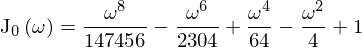

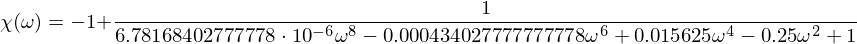

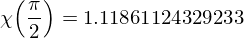

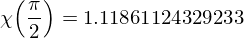

In [13]:
f_chi   = sy.Function('chi', real=True)(omega)
sy.Eq(f_J0, br.sinuosity.bessel_zero_approx(n_terms=9))
chi_bessel_lambda = br.sinuosity.chi_bessel_lambda_sympy()
sy.Eq(f_chi, chi_bessel_lambda(omega))
sy.Eq(f_chi.subs(omega,sy.pi/2),sy.N(chi_bessel_lambda(sy.pi/2)))
chi_bessel_lambda = br.sinuosity.chi_bessel_lambda_numpy()
sy.Eq(f_chi.subs(omega,sy.pi/2),chi_bessel_lambda(np.pi/2))

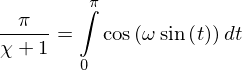

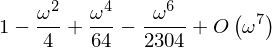

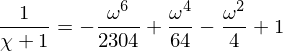

In [14]:
chi = sy.symbols('chi',  real=True, negative=False ) #real=True, 
sy.Eq((sy.pi)/(chi+1),sy.integrate(sy.cos(omega*sy.sin(t)),(t,0,sy.pi)))
chi_bessel_approx = sy.series(sy.besselj(0, omega),n=7)
chi_bessel_approx
chi_eqn = sy.Eq(1/(1+chi),chi_bessel_approx.removeO())
chi_eqn

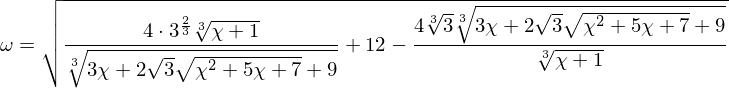

In [15]:
Ksqrt_eqn = sy.Eq(omega,sy.simplify(sy.solve(chi_eqn.subs(chi+1,Ksqrt**2),omega)[1]))
omega_for_chi = sy.sqrt(sy.simplify(Ksqrt_eqn.rhs**2).subs(Ksqrt**2,chi+1))
# omega_for_chi
# sy.Eq(3*chi+(chi+1)**2+6,sy.factor(3*chi+(chi+1)**2+6,chi))
omega_for_chi_eqn = sy.Eq(omega,omega_for_chi).subs(3*chi+(chi+1)**2+6,chi**2+5*chi+7)
omega_for_chi_eqn

In [16]:
n_omegas = 300
omega_array = np.linspace(0,2*np.pi/3,n_omegas)
L_x = 1
m_chi_Ls_R_array = br.sinuosity.m_chi_Ls_R_from_omegas_L(omega_array,L_x,ds=0.01)
chi_interp_for_m, R_interp_for_chi \
    = br.sinuosity.interp_R_chi(m_chi_Ls_R_array, interp_method = 'quadratic')

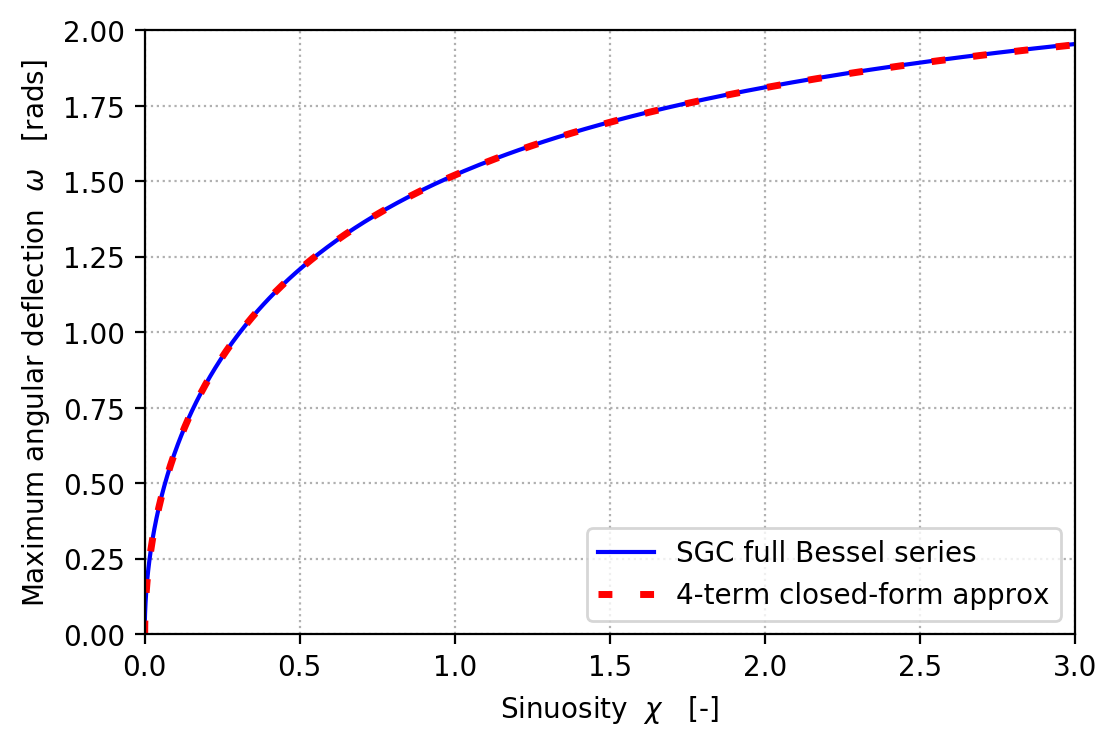

In [17]:
omega_for_chi_lambda = sy.lambdify(chi,sy.N(omega_for_chi_eqn.rhs),'numpy')
closed_form = omega_for_chi_lambda(m_chi_Ls_R_array[1])
br.plot.plot_omega_for_chi(sm, m_chi_Ls_R_array[1],omega_array,
                                  closed_form=closed_form)

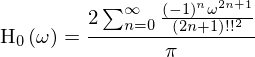

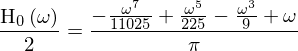

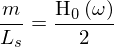

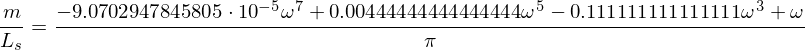

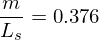

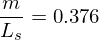

In [18]:
sy.Eq(f_H0, br.struve_zero_series()/(sy.pi/2))
sy.Eq(f_H0/2, br.struve_zero_approx(n_terms=9)/(sy.pi))
mndim_struve_lambda = br.mndim_struve_lambda_sympy()
sy.Eq(m/Ls, f_H0/2)
sy.Eq(m/Ls, mndim_struve_lambda(omega))
sy.Eq(chi,np.round(chi_bessel_lambda(np.pi/2),3))
Ls_x = 1+chi_bessel_lambda(np.pi/2)
sy.Eq(Ls,np.round(Ls_x,3))
sy.Eq(m/Ls, sy.N(mndim_struve_lambda(sy.pi/2)).round(3))
mndim_struve_lambda = br.mndim_struve_lambda_numpy()
sy.Eq(m/Ls, np.round(mndim_struve_lambda(np.pi/2),3))
sy.Eq(m, np.round(Ls_x*mndim_struve_lambda(np.pi/2),3))

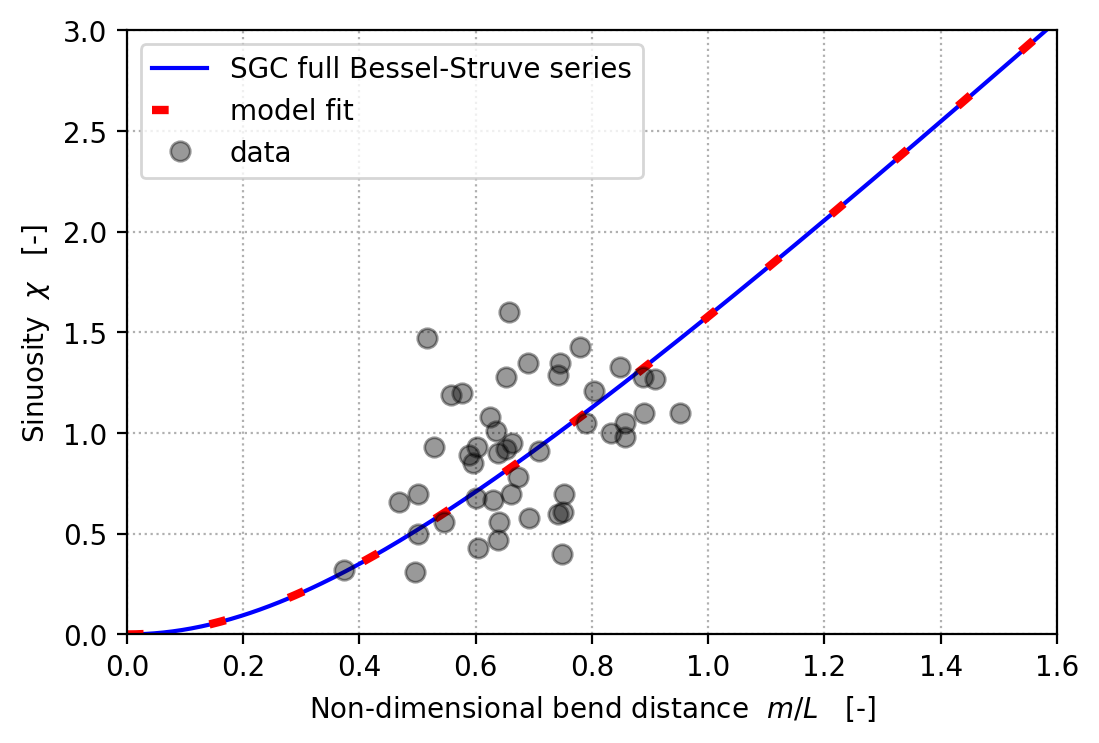

In [19]:
br.plot.plot_chi_for_m(sm, m_chi_Ls_R_array[0],m_chi_Ls_R_array[1],
#                               interp_fn=chi_interp_for_m
                              data=(williams_chi_for_mndim,'data')
                             )

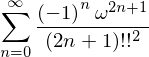

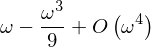

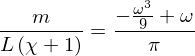

In [20]:
m_struve_series = (sy.Sum((-1)**n*omega**(2*n+1)
                  /((sy.factorial2(2*n+1))**2), (n, 0, sy.oo)))  
m_struve_series
m_struve_approx_plus = sy.simplify(m_struve_series.doit().series(n=4))
m_struve_approx_plus
mndim_struve_approx = sy.Add(*m_struve_approx_plus.args[0:-1])
# mrel_struve_approx
# Possible 2 factor error here
mndim_for_omega_eqn = sy.Eq((m)/((1+chi)*L),mndim_struve_approx/sy.pi)
mndim_for_omega_eqn

# sy.Eq(chi,sy.solve(mrel_for_omega_eqn,chi)[0])
# sy.N(sy.re(sy.simplify(sy.solve(mrel_for_omega_eqn,omega)[0])
#      .subs(sm.default_params_dict).subs(m,1000)), chop=True)

## Bend radius of curvature

We now seek the radius of curvature $R$ in terms of centerline deflection $y$ or sinuosity $\chi$, and bend length scale ${L}$ (note: this symbol represents half-wavelength, not wavelength).

\begin{equation}
    R = \dfrac{2 L(\chi+1)^{3/2}}{13\sqrt{\chi}}
\end{equation}

This centerline function has a minimum for constant ${L}$ at:

\begin{equation}
    \dfrac{\mathrm{d}R}{\mathrm{d}\chi}
    = \dfrac{L\sqrt{\chi+1}(2\chi-1)}{13\chi^{3/2}}
    = 0
\end{equation}

giving 

\begin{equation}
    \chi=\dfrac{1}{2} \,,\quad 
    \dfrac{R_\mathrm{min}}{L} = \dfrac{3\sqrt{3}}{13} \approx 0.4
\end{equation}



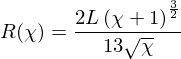

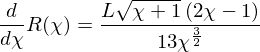

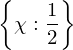

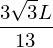

In [21]:
sm.R_eqn
dRdchi_eqn = sy.Eq(sy.diff(sm.R_eqn.lhs,chi_positive),
                   sy.simplify(sy.diff(sm.R_eqn.rhs,chi_positive)) )
dRdchi_eqn
sy.solve(sy.Eq(dRdchi_eqn.rhs))[0]
sm.R_eqn.rhs.subs(chi_positive,sy.Rational(1,2))
sy.N(_/L).round(4)

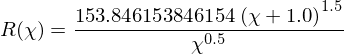

In [22]:
sm.get_params()
sy.N(sm.R_eqn.subs({L:1000,chi:1}))
chi = sy.symbols('chi',  positive=True )
# chi_solns = sy.solve(sy.Eq(R,sm.R_eqn.rhs),chi)
chi_solns = sy.simplify(sy.solve(sy.simplify(sy.Eq(R**2*169*chi,
                                                   sm.R_eqn.rhs**2*169*chi)),chi))
[sy.re(sy.N(chi_soln.subs({L:1000,R:435.142634576337}),chop=True)) for chi_soln in chi_solns]

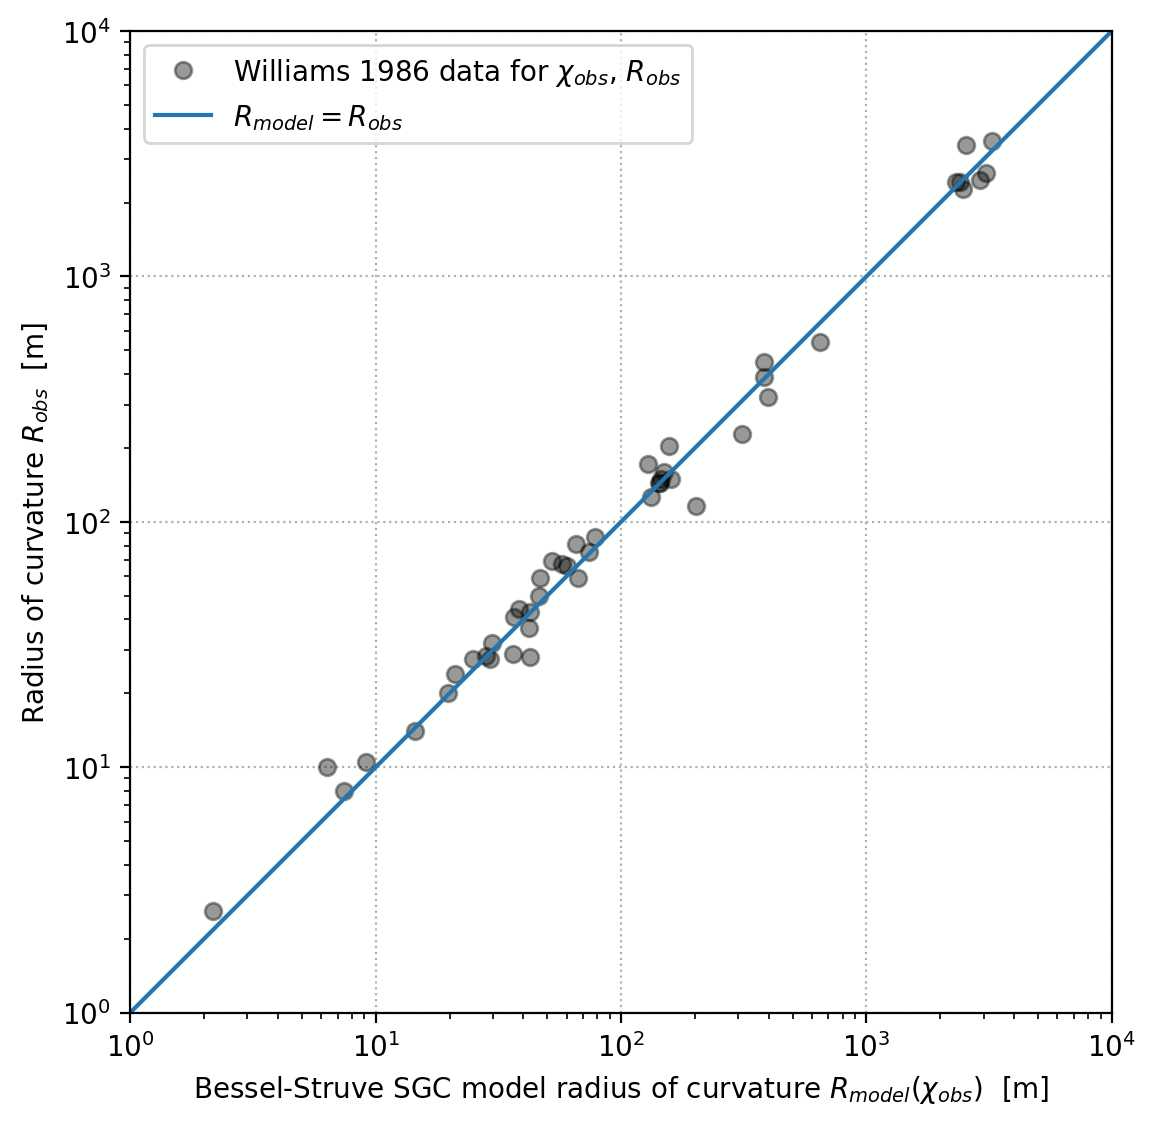

In [23]:
br.plot.plot_R_for_R(sm, R_interp_for_chi, williams_df)

[0.11255413 1.2659282 ]


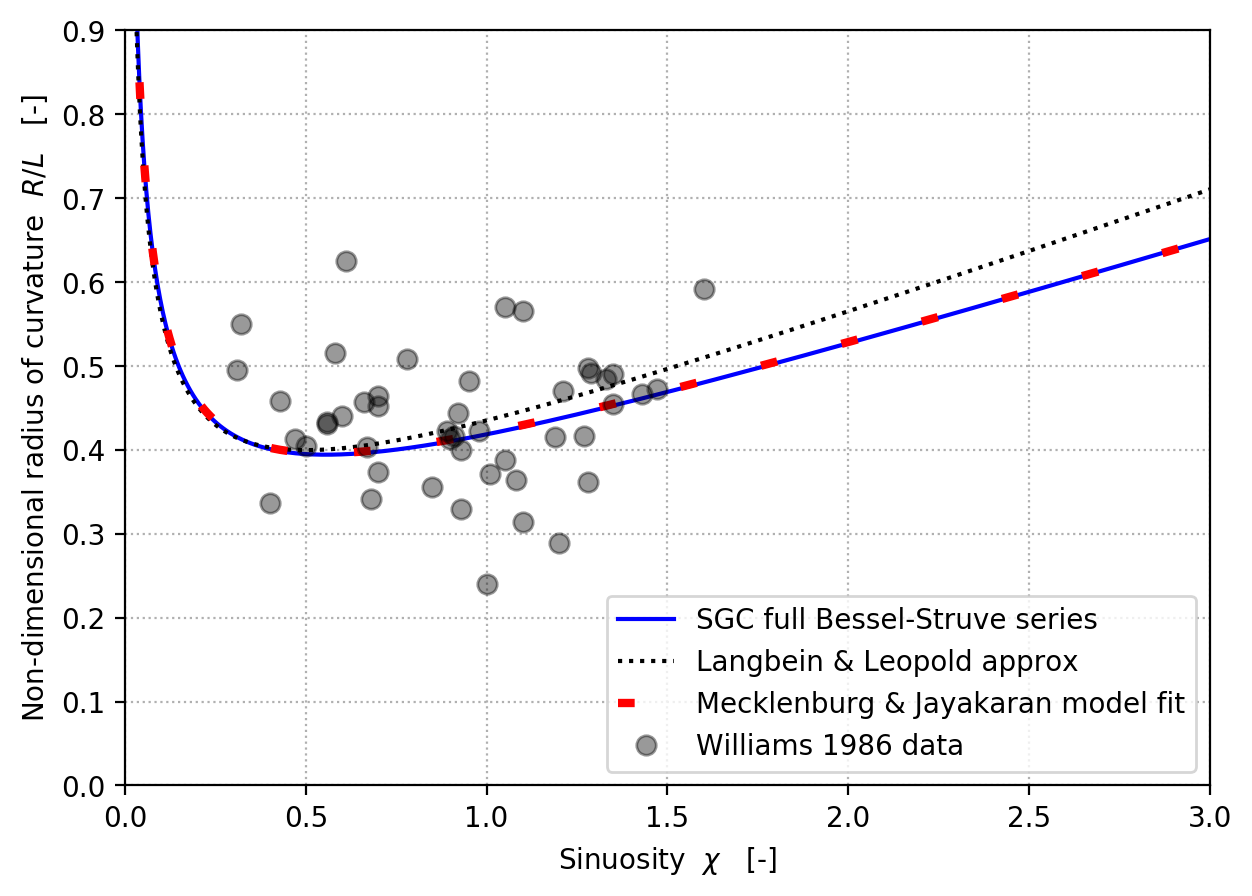

In [24]:
chi_array = m_chi_Ls_R_array[1,1:]
# Ls_array = m_chi_Ls_R_array[2,1:]
classic_approx = sm.R_for_chi(chi_array,L_x)/L_x
meckjaya_approx = 0.112*(chi_array+1)**1.27/(np.sqrt((np.sqrt(chi_array+1)-1)))
# meckjaya_approx = (L_x/np.sqrt(2*(1-1/np.sqrt(chi+1))))
br.plot.plot_R_for_chi_bessel(sm, m_chi_Ls_R_array[1],m_chi_Ls_R_array[3],
#                                      interp_fn=R_interp_for_chi,
                                     classic_approx=classic_approx,
                                     data=(williams_Rndim_for_chi,'Williams 1986 data'))

## Bend excess speed

Assumption: flow speed excess $\Delta{u}$ along the outer bank relative to centerline flow speed $u$ is proportional channel half-width $w/2$ relative to radius of curvature $R$. Defining this ratio as $\epsilon$, we have:

\begin{equation}
    \epsilon = \dfrac{\Delta{u}}{u} \,\propto\, \dfrac{w}{2R}
\end{equation}

giving:

\begin{equation}
   \epsilon = \dfrac{13 w\sqrt{\chi}}{4 L(\chi+1)^{3/2}}
\end{equation}


This excess speed function has a maximum for constant $\omega$ given by:

\begin{equation}
    \dfrac{\mathrm{d}\epsilon}{\mathrm{d}\chi}
    = \dfrac{13 w(1-2\chi)}{8L\sqrt{\chi}(\chi+1)^{5/2}}
    = 0
\end{equation}

giving:

\begin{equation}
    \chi=\dfrac{1}{2} \,,\quad 
    \epsilon_\mathrm{min} = \dfrac{3\sqrt{3}}{18}\dfrac{w}{L} 
    \approx 1.251\dfrac{w}{L}
\end{equation}


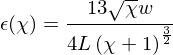

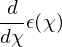

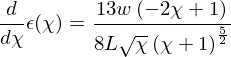

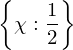

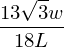

In [25]:
chi = sy.symbols('chi',  positive=True ) #real=True, 
sm.epsilon_eqn
tmp = sy.diff(sm.epsilon_eqn.args[0],chi)
tmp
depsilondchi_eqn = sy.Eq(tmp,
                   sy.simplify(sy.diff(sm.epsilon_eqn.args[1],chi)) )
depsilondchi_eqn
sy.solve(sy.Eq(depsilondchi_eqn.args[1]))[0]
sm.epsilon_eqn.args[1].subs(chi,sy.Rational(1,2))
sy.N(_*L/w).round(4)

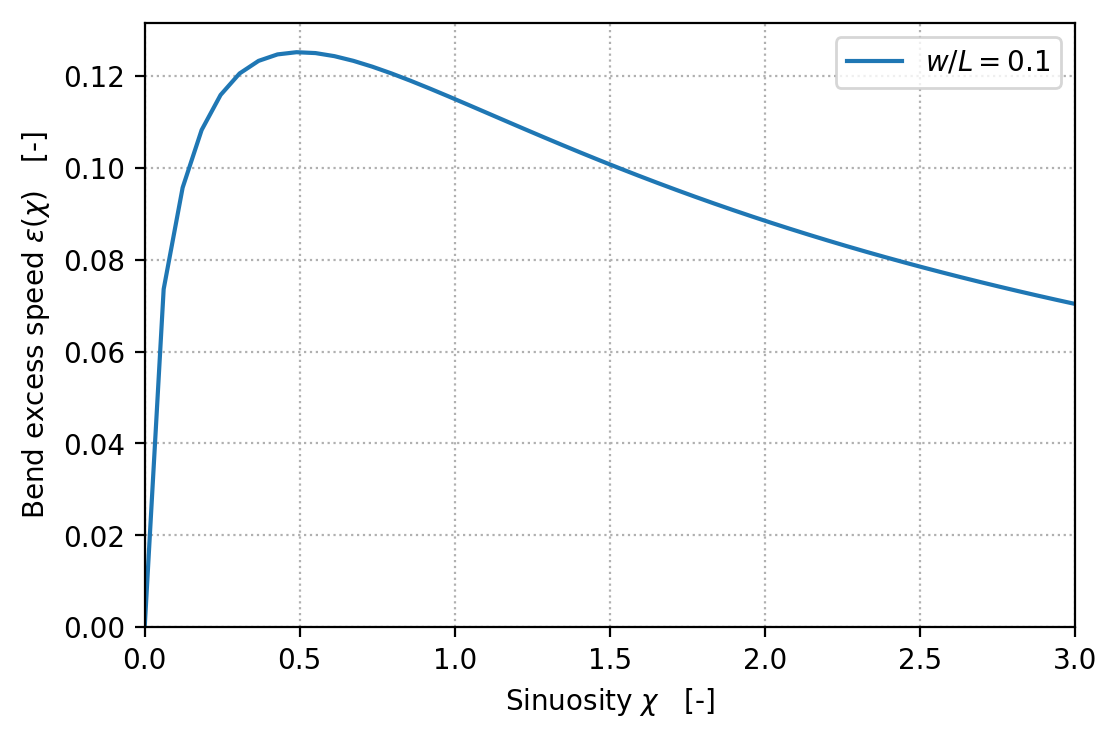

In [26]:
br.plot.plot_epsilon_for_chi(sm, w=100,L=1000)

## Corner velocity

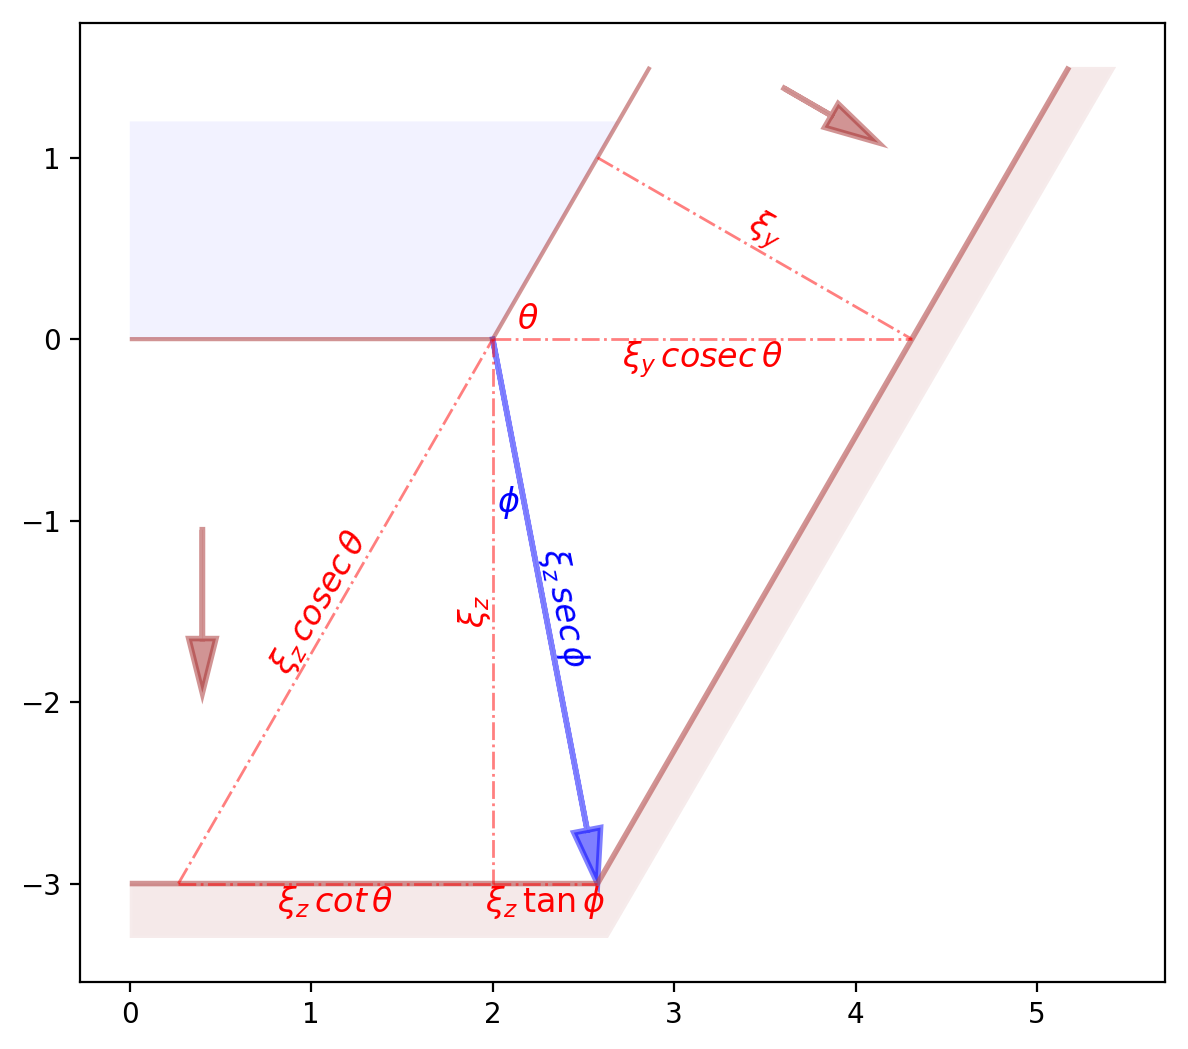

In [27]:
br.plot.plot_corner_fig(sm)

We seek a value for $\phi$ knowing ${\xi_y}$, ${\xi_z}$, and $\theta$. Starting with:

\begin{equation}
    {\xi_z} \tan\phi
      = {\xi_y} \,\mathrm{cosec}\,\theta - {\xi_z}\cot\theta
\end{equation}

we find:

\begin{equation}
    \phi_\pm
      = \arctan\left(
      \dfrac{\xi_{y\pm}}{\xi_z} \,\mathrm{cosec}\,\theta - \cot\theta
              \right)
\end{equation}

where the $\pm$ subscript indicates left ($+$) or right ($-$) corners.

The corner velocities ${\mathrm{d}\vec{c}_\pm}/{\mathrm{d}t}$ are now known in terms of $\phi_\pm$ and $\xi_{z}$:

\begin{equation}
    \dfrac{\mathrm{d}\vec{c}_\pm}{\mathrm{d}t} 
    \equiv 
    \begin{pmatrix}
        \mathrm{d}{c_\pm}/\mathrm{d}{t} \\
        \mathrm{d}{h}/\mathrm{d}{t}
    \end{pmatrix}
    \,=\, {\xi_z} \begin{pmatrix}
        \tan\phi_\pm \\
        1
      \end{pmatrix}
    \,=\, \begin{pmatrix}
        {\xi_{y\pm}} \,\mathrm{cosec}\,\theta  - {\xi_z}\cot\theta \\
        {\xi_z} 
      \end{pmatrix}
\end{equation}

The rate of widening is:

\begin{equation}
    \dfrac{\mathrm{d}w}{\mathrm{d}t} 
    \equiv 
    \dfrac{\mathrm{d}c_{+}}{\mathrm{d}t} 
    +\dfrac{\mathrm{d}c_{-}}{\mathrm{d}t} 
    \,=\, {\xi_z}\left(\tan\phi_{+}+\tan\phi_{-}\right)
    = \left({\xi_{y+}}+{\xi_{y-}}\right)\,\mathrm{cosec}\,\theta  
                        - 2{\xi_z}\cot\theta
\end{equation}

If we treat meandering and sinuosity growth in the $+y$ direction only, we can assume $c_{+}>c_{-}$, the rate of lateral channel motion aka sinuosity growth is:

\begin{equation}
    \dfrac{\mathrm{d}m}{\mathrm{d}t} \equiv 
    \dfrac{1}{2}\left(\dfrac{\mathrm{d}c_{+}}{\mathrm{d}t} 
                     -\dfrac{\mathrm{d}c_{-}}{\mathrm{d}t} \right)
    \,=\, \dfrac{{\xi_z}}{2}\left(\tan\phi_{+}-\tan\phi_{-}\right)
    = \dfrac{1}{2}\left({\xi_{y+}}-{\xi_{y-}}\right)
                                  \,\mathrm{cosec}\,\theta 
\end{equation}

Channel widening versus narrowing is determined by:

\begin{eqnarray}
    \xi_{+}+\xi_{-} &>2\xi_z\cos\theta & \quad\dots\,\,\text{widening} \\
    \xi_{+}+\xi_{-} &=2\xi_z\cos\theta & \quad\dots\,\,\text{stable} \\
    \xi_{+}+\xi_{-} &<2\xi_z\cos\theta & \quad\dots\,\,\text{narrowing} 
\end{eqnarray}

Sinuosity evolution is determined by:

\begin{eqnarray}
    \xi_{+}&>\xi_{-} &   \quad\dots\,\,\text{meandering} \\
    \xi_{+}&=\xi_{-} &   \quad\dots\,\,\text{stationary} \\
    \xi_{+}&<\xi_{-} &   \quad\dots\,\,\text{straightening} 
\end{eqnarray}

It turns out that $\xi_{+}>\xi_{-}$ is always the case, such that sinuosity never stabilizes or reduces, although growth can slow to a crawl.

## Hydraulic geometry and flow speed

The next challenge is to find algebraic/trigonometric forms for mean flow speed $u$ and flow depth $d$.
The place to start is with
channel cross-sectional area $A$, which is a function of channel base (geometric) width $w$ and flow depth:

\begin{equation}
    A = d (w + d {\,\mathrm{cot}\,} \theta)
\end{equation}

and which is related to water-volume throughput $Q$ and flow speed:

\begin{equation}
    A = Q/u
\end{equation}

So we have a "geometric" function for flow speed in terms of flow depth:

\begin{equation}
    u = \dfrac{Q}{w d + d^2{\,\mathrm{cot}\,} \theta}
\end{equation}

We need another equation to disambiguate $u$ and $d$.

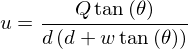

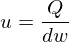

In [28]:
sm.u_geometric_eqn
sm.u_geometric_eqn.subs(d+w*sy.tan(theta),w*sy.tan(theta))

Assuming subcritical, steady flow, the mean bed shear stress $\tau$  averaged across the channel cross-sectional perimeter $p$, for a channel centerline (energy slope) angle $\beta$, and with water density $\rho$ and gravity $g$, is:

\begin{equation}
    p\tau = \rho g A \sin\beta
\end{equation}

where 

\begin{equation}
    p =  w  + 2 d {\,\mathrm{cosec}\,} \theta
\end{equation}

The mean boundary shear stress can be estimated in several ways, and the simplest is to assume Chézy friction, with a friction factor $f$:

\begin{equation}
    \tau = f \rho u^2 \,\,,\quad f = g C^2 
    \quad\Rightarrow\qquad
    \tau = \rho g C^2 u^2
\end{equation}

In passing, it's worth noting that typical values here are $f = 0.01$ and $C^2 = 10^{-3}\,\mathrm{s}^{2}\,\mathrm{m}^{-1}$.

Combining to eliminate $\tau$:

\begin{equation}
    \left(w  + 2 d {\,\mathrm{cosec}\,} \theta\right)\rho g C^2 u^2
    = \rho g \dfrac{Q}{u} \sin\beta
\end{equation}

which rearranges to give a second, "dynamic", function for flow speed in terms of flow depth:

\begin{equation}
     u^3
    = \dfrac{Q \sin\beta}
            { C^2(w  + 2 d {\,\mathrm{cosec}\,} \theta)}
\end{equation}

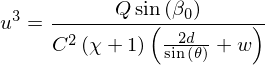

In [29]:
sm.ucubed_dynamic_eqn

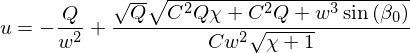

In [30]:
sm.u_eqn_rect
sm.u_eqn_rect.args[1].subs(sm.default_params_dict).round(2)

Rearranging the dynamic equation, we can write "dynamic" flow depth as:

\begin{equation}
    d = \left(\dfrac{Q \sin\beta}{C^2 u^3} - w\right)\dfrac{\sin\theta}{2}
\end{equation}

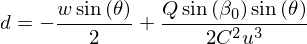

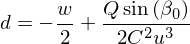

In [31]:
sm.d_dynamic_eqn
sm.d_dynamic_eqn.subs(theta,sy.pi/2)

Similarly, rearranging the flow geometry equation we have:

\begin{equation}
    (u {\,\mathrm{cot}\,}\theta) d^2 + u w d - Q = 0
\end{equation}

which solves to give:

\begin{equation}
    d = \dfrac{ - u w \pm \sqrt{u^2 w^2 + 4 u Q{\,\mathrm{cot}\,}\theta }}
              {2 u {\,\mathrm{cot}\,}\theta}
\end{equation}

Taking the positive solution gives a "geometric" solution for flow depth:

\begin{equation}
    d = \dfrac{w\tan\theta}{2} \left(
     \sqrt{1 + \dfrac{4Q}{w^2 u \tan\theta} }
        - 1 \right)
\end{equation}

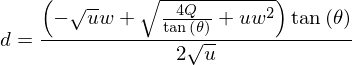

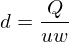

In [32]:
sm.d_geometric_eqn
sy.Eq(d,Q/(u*w))

Combining the geometric and dynamic equations for $d$, and rearranging, we get a sixth-order polynomial in $d$:

In [33]:
sm.d_polynomial_eqn
sy.expand(sm.d_polynomial_eqn)

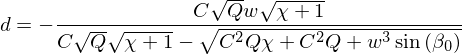

In [34]:
sm.d_eqn_rect
sm.d_eqn_rect.args[1].subs(sm.default_params_dict).round(2)

Combining the geometric and dynamic equations for $u$, and rearranging, we get a sixth-order polynomial in $\sqrt{u}$:

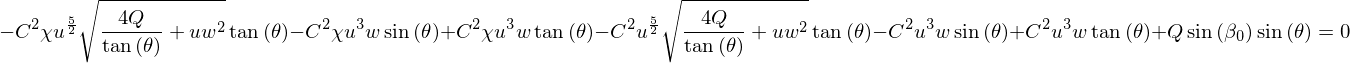

In [35]:
sm.u_polynomial_eqn = sm.u_eqn()
sm.u_polynomial_eqn

In [36]:
# pdict = sm.default_params_dict
# pdict.update({u:u,d:d,w:w,chi:chi,theta:sy.pi/3})
u_eqn2 = sy.simplify(sy.simplify(sy.expand(
        sm.u_polynomial_eqn.args[0])
                               .subs(sy.tan(theta),t))
                               .subs(t,sy.tan(theta)) ) 
u_eqn2

### Checking

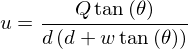

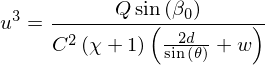

In [37]:
sm.u_geometric_eqn
sm.ucubed_dynamic_eqn

In [38]:
# sm.set_params({d:2.76, u:3.125, beta_0:5e-3})
sm.get_params()

In [39]:
sy.Eq(u,sm.u_geometric_eqn.args[1].subs(sm.get_params()).round(3))
sy.Eq(u, (sm.ucubed_dynamic_eqn.args[1].subs(sm.get_params())**(1/3)).round(3) )

Check: try with $w=10\,\mathrm{m}$, $Q = 100\,\mathrm{m}^3\,\mathrm{s}^{-1}$, $\theta=\dfrac{\pi}{3}$, $\sin\beta= 5 \times 10^{-3}$, $C^2 = 10^{-3}\,\mathrm{s}^2\mathrm{m}^{-1}$, and a guessed depth of $d=2.76\,\mathrm{m}$:

 - in the geometric flow function we get  $u\approx3.125\,\mathrm{m}\,\mathrm{s}^{-1}$
 - in the dynamic flow function we get $u\approx3.126\,\mathrm{m}\,\mathrm{s}^{-1}$

which indicates the functions are mutually consistent, hydraulically reasonable, and
dimensionally correct.

To check the polynomial root finders, let's numerically solve for $u$ and $d$ for these same parameters:

In [40]:
sm.specify_u_polynomial_constants({w:w,chi:chi})
sm.specify_d_polynomial_constants({w:w,chi:chi})

In [41]:
sy.Eq(u,sm.root_u_polynomial({w:10,chi:0}).round(4))
sy.Eq(d,sm.root_d_polynomial({w:10,chi:0}).round(4))

To check the polynomial root finders, let's numerically solve for $u$ and $d$ for these same parameters:

## Bedrock wear

In [42]:
z, Z, k  = sy.symbols('z Z k',  positive=True ) 
z_0, H, Z_0 = sy.symbols('z_0 H Z0',  positive=True) 
nu = sy.symbols('nu',  positive=True, rational=True ) 
f_varphi = sy.Function('varphi', real=True)(Z)

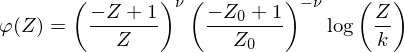

In [43]:
varphi_eqn = sy.Eq(f_varphi, sy.log(Z/k)*((1-Z)/Z)**nu / ((1-Z_0)/Z_0)**nu)
varphi_eqn

In [66]:
varphi_lambda = sy.lambdify((Z,nu,k,Z_0),varphi_eqn.rhs,'sympy')
varphi_lambda(0.5,0.1,0.1,0.01)

From Mathematica:

integral log(z/z0) ((1 - z)/z)^ν dz = -(z (1/z - 1)^ν (1 - z)^(-ν) (ν _3 F_2(1 - ν, 1 - ν, 1 - ν;2 - ν, 2 - ν;z) + (ν - 1) 2F1(1 - ν, -ν, 2 - ν, z) (log(z/z0) - 1)))/(ν - 1)^2 + constant

In [69]:
# sy.integrate(varphi_eqn.rhs,(Z,x,1))

KeyboardInterrupt: 

In [46]:
# from sympy.integrals.meijerint import meijerint_definite, meijerint_indefinite
# tmp = meijerint_indefinite((sy.cos(x)/x)**2, x)
# tmp?

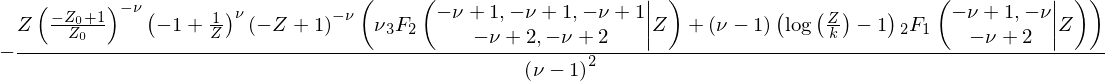

In [72]:
varphi_indefinite_integral = \
-1/(nu-1)**2 * Z*(1/Z-1)**nu * (1-Z)**(-nu)*(
               nu*sy.hyper([1-nu,1-nu,1-nu],[2-nu,2-nu],Z)
            + (nu-1)*sy.hyper([1-nu,-nu],[2-nu],Z)*(sy.log(Z/k)-1)
)/ ((1-Z_0)/Z_0)**nu
varphi_indefinite_integral
sy.N(varphi_indefinite_integral.subs({Z:0.5,nu:0.1,k:0.1,Z_0:0.01}))
sy.N(varphi_indefinite_integral.subs({Z:0.1,nu:0.1,k:0.1,Z_0:0.01}))

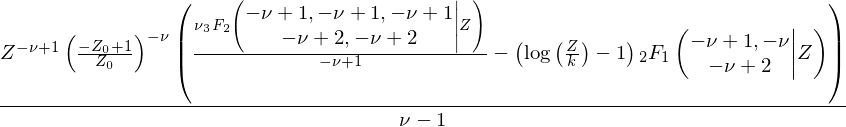

In [71]:
varphi_indefinite_integral = \
1/(nu-1) * Z**(1-nu)*(
               nu*sy.hyper([1-nu,1-nu,1-nu],[2-nu,2-nu],Z)/(1-nu)
            - sy.hyper([1-nu,-nu],[2-nu],Z)*(sy.log(Z/k)-1)
)/ ((1-Z_0)/Z_0)**nu
varphi_indefinite_integral
sy.N(varphi_indefinite_integral.subs({Z:0.5,nu:0.1,k:0.1,Z_0:0.01}))
sy.N(varphi_indefinite_integral.subs({Z:0.1,nu:0.1,k:0.1,Z_0:0.01}))

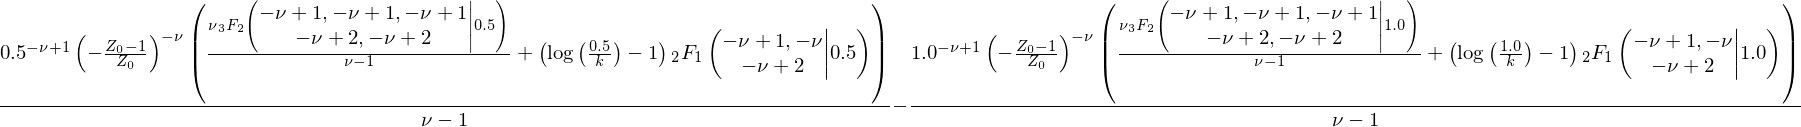

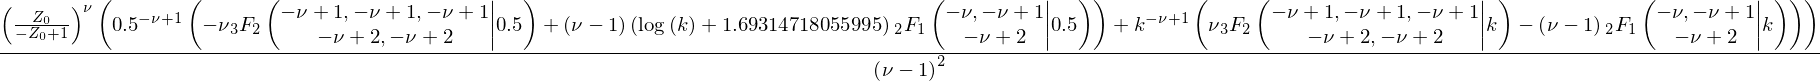

In [49]:
varphi_integral_top = sy.simplify(  varphi_indefinite_integral.subs(Z,1.0)
                                   -varphi_indefinite_integral.subs(Z,0.5) )
varphi_integral_bot = sy.simplify(  varphi_indefinite_integral.subs(Z,0.5)
                                   -varphi_indefinite_integral.subs(Z,k) )
varphi_integral_top
varphi_integral_bot

In [50]:
sy.N(varphi_integral_top.subs({nu:0.3,Z_0:0.01,k:0.1})) \
/sy.N(varphi_integral_bot.subs({nu:0.3,Z_0:0.01,k:0.1}))

In [51]:
sy.N(varphi_integral_top.subs({nu:0.1,Z_0:0.01,k:0.0000001})) \
/sy.N(varphi_integral_bot.subs({nu:0.1,Z_0:0.01,k:0.0000001}))

In [52]:
varphi_integral_lambda = sy.lambdify((Z,nu,k,Z_0),varphi_indefinite_integral,'sympy')
np.float(sy.N(varphi_integral_lambda(0.5,0.1,0.1,0.01)))

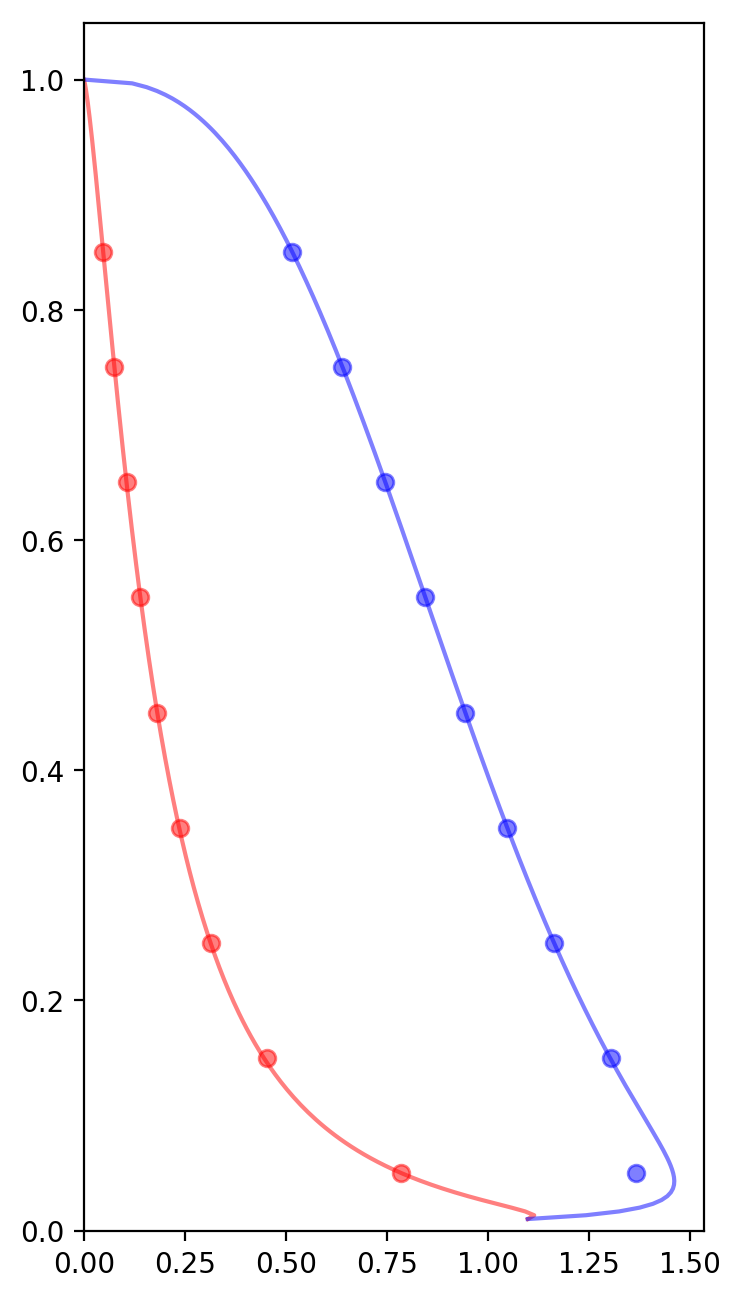

In [77]:
n_pts = 300
nZ = 10
dZ = 1/nZ
k_x = 0.1/30
Z_0x = 0.01

Z_profile_array = np.linspace(Z_0x,1,n_pts)
Z_histogram_profile_array = np.linspace(0,1-dZ,nZ)

fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(4,8)

nu_x = 0.06/(0.4*0.2)
qs_profile_array = [np.float(sy.N(varphi_lambda(Z_x,nu_x,k_x,Z_0x))) 
                    for Z_x in Z_profile_array]
qs_histogram_profile_array = np.array([(  
     sy.N(varphi_indefinite_integral.subs({Z:max(Z_x,k_x)+dZ,nu:nu_x,k:k_x,Z_0:Z_0x})) 
    -sy.N(varphi_indefinite_integral.subs({Z:max(Z_x,k_x),nu:nu_x,k:k_x,Z_0:Z_0x})) )
                  for Z_x in Z_histogram_profile_array])
Z_histogram_profile_array
qs_histogram_profile_array

plt.plot(qs_profile_array,Z_profile_array, 'r',alpha=0.5)
plt.plot(qs_histogram_profile_array/dZ, Z_histogram_profile_array+dZ/2, 'ro',alpha=0.5)

nu_x = 0.03/(0.4*0.2)
qs_profile_array = [np.float(sy.N(varphi_lambda(Z_x,nu_x,k_x,Z_0x))) 
                    for Z_x in Z_profile_array]
qs_histogram_profile_array = np.array([(  
     sy.N(varphi_indefinite_integral.subs({Z:max(Z_x,k_x)+dZ,nu:nu_x,k:k_x,Z_0:Z_0x})) 
    -sy.N(varphi_indefinite_integral.subs({Z:max(Z_x,k_x),nu:nu_x,k:k_x,Z_0:Z_0x})) )
                  for Z_x in Z_histogram_profile_array])
plt.plot(qs_profile_array,Z_profile_array, 'b',alpha=0.5)
plt.plot(qs_histogram_profile_array/dZ, Z_histogram_profile_array+dZ/2, 'bo',alpha=0.5)

# plt.autoscale(enable=True,tight=True)
plt.xlim(0);
plt.ylim(0);

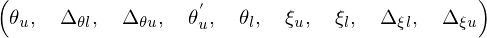

In [75]:
theta_u, theta_l = sy.symbols('theta_u theta_l',  real=True ) 
theta_up = sy.symbols("theta^'_u",  real=True ) 
dtheta_l, dtheta_u = sy.symbols("Delta_theta_l Delta_theta_u",  real=True ) 
dxi_l, dxi_u = sy.symbols('Delta_xi_l Delta_xi_u',  real=True ) 
xi_u, xi_l = sy.symbols('xi_u xi_l',  positive=True ) 
c = sy.symbols('c',  positive=True ) 
theta_u, dtheta_l, dtheta_u, theta_up, theta_l, xi_u, xi_l, dxi_l, dxi_u

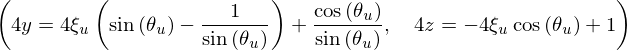

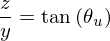

In [55]:
y_eqn = sy.Eq(4*y, 
              (4*xi_u*(sy.sin(theta_u)-1/sy.sin(theta_u))
                          +sy.cos(theta_u)/sy.sin(theta_u)))
z_eqn = sy.Eq(4*z, 1-4*xi_u*sy.cos(theta_u))
zy = sy.Eq(z/y,sy.simplify(z_eqn.rhs/y_eqn.rhs))
y_eqn,z_eqn
zy

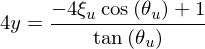

In [56]:
sy.simplify(y_eqn)

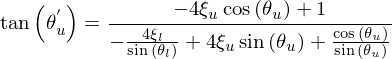

In [57]:
tanthup_eqn = sy.Eq(sy.tan(theta_up),  
                    (  (1-4*xi_u*sy.cos(theta_u))
     /(sy.cos(theta_u)/sy.sin(theta_u)+4*(xi_u*sy.sin(theta_u)-xi_l/sy.sin(theta_l))  )   )
                   )
tanthup_eqn

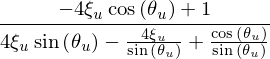

In [58]:
tanthup_eqn.rhs.subs(xi_l/sy.sin(theta_l),xi_u/sy.sin(theta_u))
sy.simplify(_)

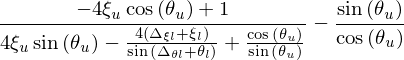

In [59]:
tmp = tanthup_eqn.rhs.subs({theta_l:theta_l+dtheta_l, 
                                xi_l:xi_l+dxi_l})-sy.sin(theta_u)/sy.cos(theta_u)
tmp
tmp = sy.simplify(tmp.subs(sy.sin(theta_l),sy.sin(theta_u)*(xi_l/xi_u)))
sy.simplify(tmp.subs({dtheta_l:0,dxi_l:0}).subs(sy.sin(theta_l),sy.sin(theta_u)*(xi_l/xi_u)))

In [60]:
def difftotal(expr, diffby, diffmap):
    """Take the total derivative with respect to a variable.

    Example:

        theta, t, theta_dot = symbols("theta t theta_dot")
        difftotal(cos(theta), t, {theta: theta_dot})

    returns

        -theta_dot*sin(theta)
    """
    # Replace all symbols in the diffmap by a functional form
    fnexpr = expr.subs(list({ss:ss(diffby) for ss in diffmap}))
    # Do the differentiation
    diffexpr = sy.diff(fnexpr, diffby)
    # Replace the Derivatives with the variables in diffmap
    derivmap = {sy.Derivative(v(diffby), diffby):dv 
                for v,dv in diffmap.iteritems()}
    finaldiff = diffexpr.subs(derivmap)
    # Replace the functional forms with their original form
    return finaldiff.subs({ss(diffby):ss for ss in diffmap})

# x_dot, x_ddot, g =  sy.symbols("x_{dot} x_{ddot} g")
# x_dot, x_ddot, g 
# # d_expr = x_dot**2 + g*sy.cos(x)
# # d_expr.subs({ss:ss(t) for ss in {x: x_dot, x_dot: x_ddot}})
# difftotal(d_expr, t, {x: x_dot, x_dot: x_ddot})
# # difftotal(cos(theta), t, {theta: theta_dot})

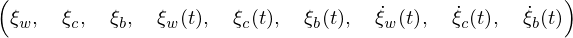

In [61]:
sym_list = ('\\xi_w','\\xi_c','\\xi_b')
xi_w, xi_c, xi_b \
    = [sy.Symbol(sym, positive=True) for sym in sym_list]
f_xi_w, f_xi_c, f_xi_b \
    = [sy.Function(sym, positive=True)(t) for sym in sym_list]
f_xi_w_dot, f_xi_c_dot, f_xi_b_dot \
    = [sy.Function('\dot'+sym, real=True)(t) for sym in sym_list]
# f_xi_w_dot, f_xi_c_dot, f_xi_b_dot = [fn.diff() for fn in (f_xi_w, f_xi_c, f_xi_b)]
xi_w, xi_c, xi_b, f_xi_w, f_xi_c, f_xi_b, f_xi_w_dot, f_xi_c_dot, f_xi_b_dot

In [62]:
sym_list = ('\\psi','\\phi')
f_psi, f_phi = [sy.Function(sym, real=True)(f_xi_w, f_xi_c, f_xi_b) for sym in sym_list]
f_psi_dot, f_phi_dot = [sy.Function('\dot'+sym, real=True)(t) for sym in sym_list]
# f_psi_dot, f_phi_dot = [fn.diff() for fn in (f_psi, f_phi)]
f_psi_dot

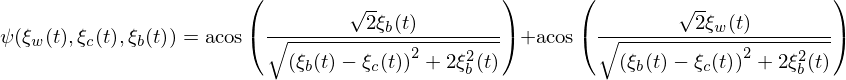

In [63]:
psi_ss_eqn = sy.Eq(f_psi,
                    sy.acos((f_xi_w)/sy.sqrt(f_xi_b**2+(f_xi_c-f_xi_b)**2/2)) 
                  + sy.acos((f_xi_b)/sy.sqrt(f_xi_b**2+(f_xi_c-f_xi_b)**2/2)) ).simplify()
psi_ss_eqn

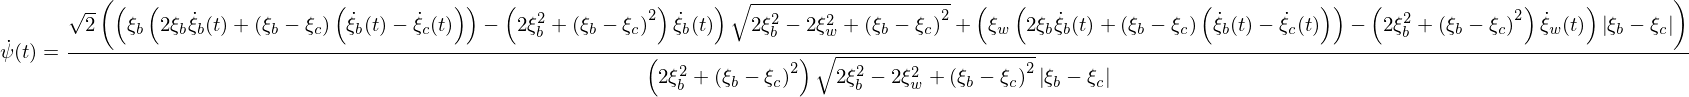

In [64]:
pi_ss_diffeqn = sy.Eq(f_psi_dot,sy.simplify(psi_ss_eqn.rhs.diff(t))) \
                    .subs( {f_xi_b.diff():f_xi_b_dot,
                            f_xi_c.diff():f_xi_c_dot,
                            f_xi_w.diff():f_xi_w_dot} )
# pi_ss_diffeqn
pi_ss_diffeqn.subs({f_xi_b:xi_b,f_xi_c:xi_c,f_xi_w:xi_w})

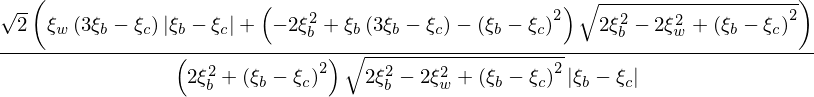

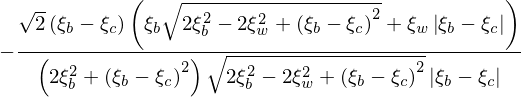

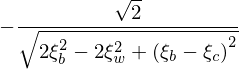

In [65]:
sy.simplify(psi_ss_eqn.rhs.diff(f_xi_b).subs({f_xi_b:xi_b,f_xi_c:xi_c,f_xi_w:xi_w}))
sy.simplify(psi_ss_eqn.rhs.diff(f_xi_c).subs({f_xi_b:xi_b,f_xi_c:xi_c,f_xi_w:xi_w}))
sy.simplify(psi_ss_eqn.rhs.diff(f_xi_w).subs({f_xi_b:xi_b,f_xi_c:xi_c,f_xi_w:xi_w}))